In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

In [3]:
data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  3 of 3 completed

1 Failed download:
['TSLA']: OperationalError('database is locked')


In [4]:
df = data['Adj Close']

In [5]:
df.isnull().sum()

Ticker
BND        0
SPY        0
TSLA    2474
dtype: int64

In [6]:
df = df.interpolate(method='linear').fillna(method='bfill')

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_8664\175707809.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill')


In [7]:
for column in df.columns:
        if not pd.api.types.is_float_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce')

In [8]:
df = df.fillna(method='bfill').fillna(method='ffill')

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_8664\3549171558.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill').fillna(method='ffill')


In [9]:
df.describe()

Ticker,BND,SPY,TSLA
count,2474.000000,2474.000000,0.0
mean,70.089251,310.253153,NaN
std,4.889919,111.250656,NaN
min,62.637566,157.328568,NaN
25%,66.314083,214.822350,NaN
50%,68.888931,275.812347,NaN
75%,73.807495,402.297516,NaN
max,79.812943,584.590027,NaN


In [10]:
df = (df - df.mean()) / df.std()

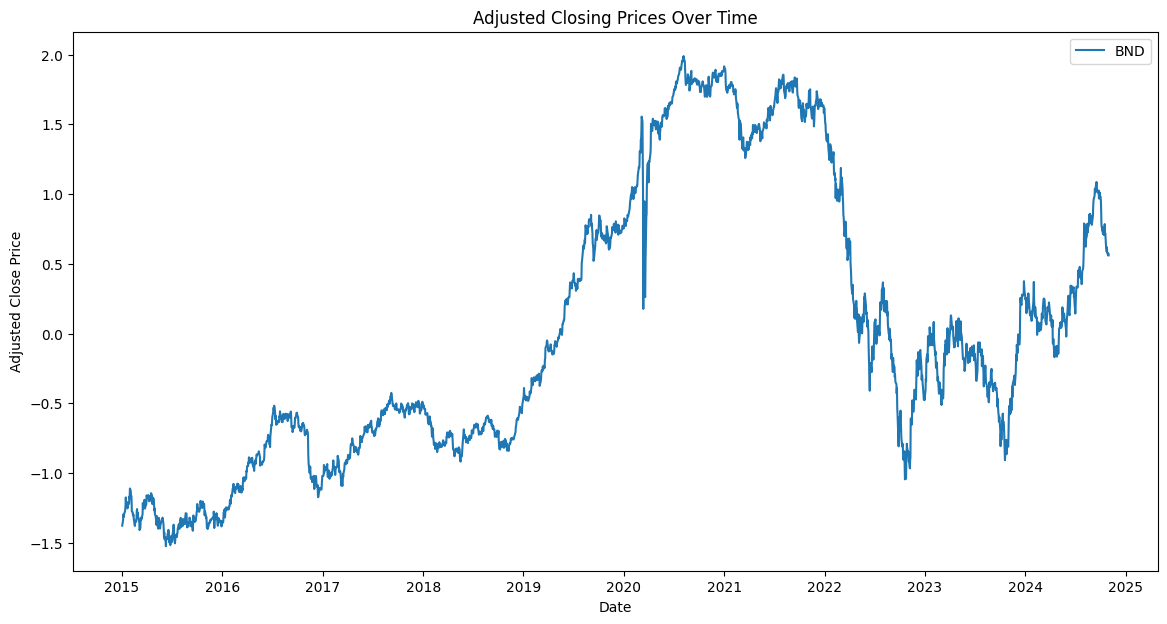

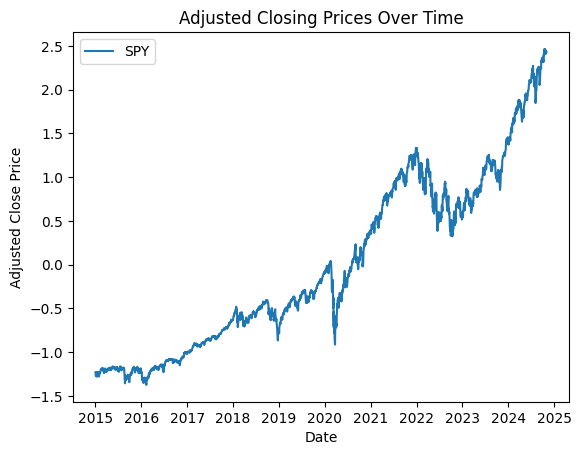

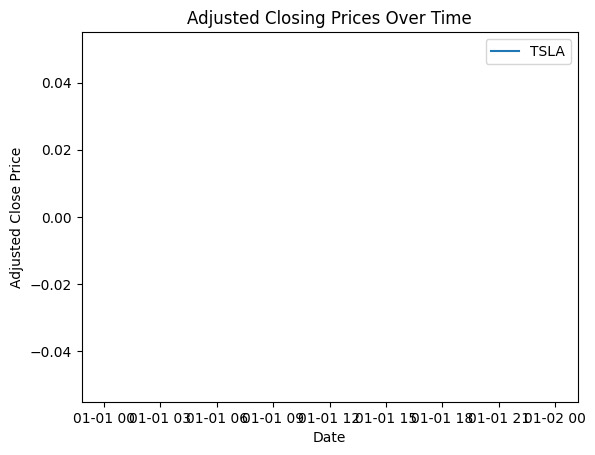

In [11]:
plt.figure(figsize=(14, 7))
for column in df.columns:
  plt.plot(df[column], label=column)
  plt.title("Adjusted Closing Prices Over Time")
  plt.xlabel("Date")
  plt.ylabel("Adjusted Close Price")
  plt.legend()
  plt.show()

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_8664\625813442.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = df.pct_change().dropna()


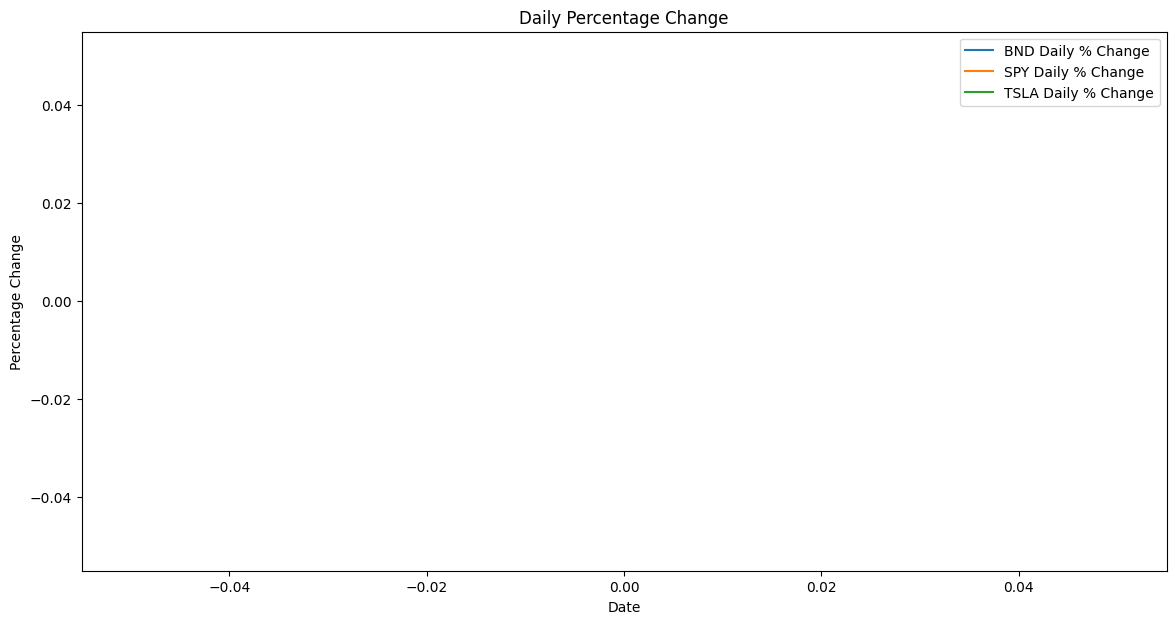

In [13]:
pct_change = df.pct_change().dropna()
plt.figure(figsize=(14, 7))
for column in pct_change.columns:
  plt.plot(pct_change[column], label=f'{column} Daily % Change')
plt.title("Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.legend()
plt.show()

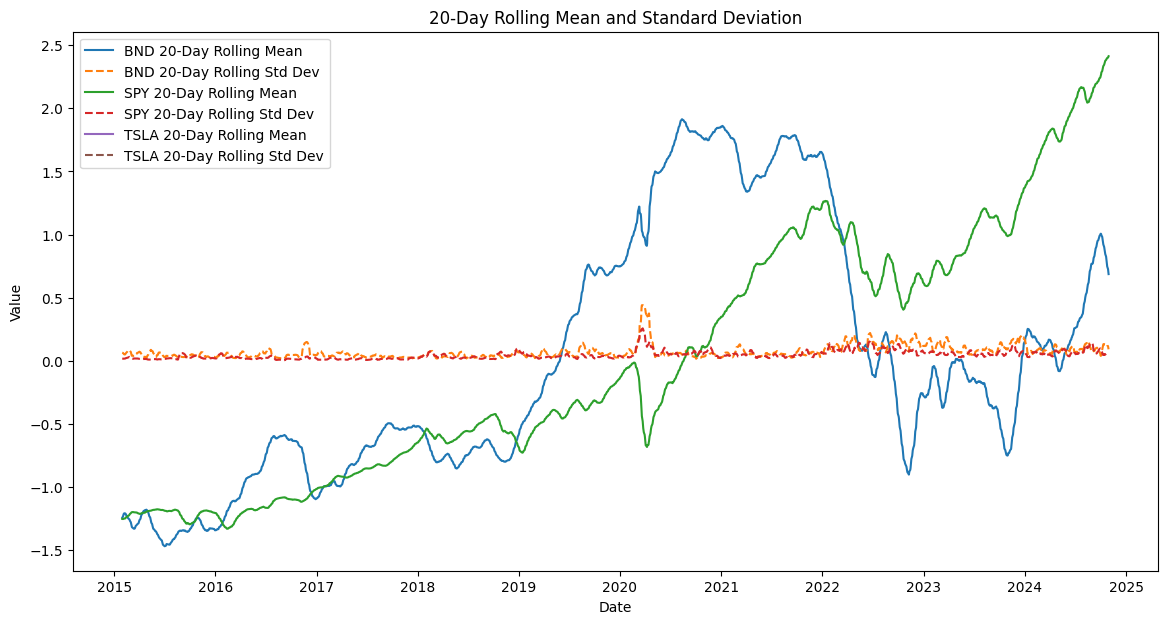

In [14]:
plt.figure(figsize=(14, 7))
window = 20
for column in df.columns:
  rolling_mean = df[column].rolling(window=window).mean()
  rolling_std = df[column].rolling(window=window).std()
  plt.plot(rolling_mean, label=f'{column} {window}-Day Rolling Mean')
  plt.plot(rolling_std, linestyle='--', label=f'{column} {window}-Day Rolling Std Dev')
plt.title(f"{window}-Day Rolling Mean and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

In [15]:
threshold = 3
outliers = pd.DataFrame()
for column in df.columns:
  z_scores = (df[column] - df[column].mean()) / df[column].std()
  outliers[column] = np.where(z_scores.abs() > threshold, df[column], np.nan)

In [25]:
daily_returns = df.pct_change().dropna()
# VaR at 5% confidence interval
var_at_risk = daily_returns.quantile(0.05)
# Sharpe Ratio (risk-adjusted return)
ratio = (daily_returns.mean() - 0.02 / 252) / daily_returns.std()

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_8664\3074745635.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()
